## Contents:
- [Import Libraries & Datasets](#Import-Libraries-&-Datasets)
- [Production Model (Lasso α = 893)](#Production-Model-(Lasso-α-=-893))
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)
- [Submit CSV File to Kaggle](#Submit-CSV-File-to-Kaggle)

## Import Libraries & Datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model & preprocessing 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline

#pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)



train = pd.read_csv('./datasets/preprocess_train.csv')
test = pd.read_csv('./datasets/preprocess_test.csv')
original_test = pd.read_csv('./datasets/new_test.csv')

## Production Model (Lasso α = 893)

As mentioned in the previous workbook, we will be using the Lasso model with an alpha = 893 as our model and see what other insights we can get from here.

In [2]:
# Create the train dataset and the test dataset
# This time we will use the whole train dataset for our variables
X_train = train.drop(columns='saleprice', axis=1)
y_train = train['saleprice']
X_test = test

# Scale our independent features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#Instantiate Lasso
lasso = Lasso(alpha=893)
# Fit the Model
lasso.fit(X_train_sc, y_train)


# Make predictions
y_pred = lasso.predict(X_test_sc)
print(f'Train R2 score of lasso model: {lasso.score(X_train_sc, y_train)}')

Train R2 score of lasso model: 0.8776763332097642


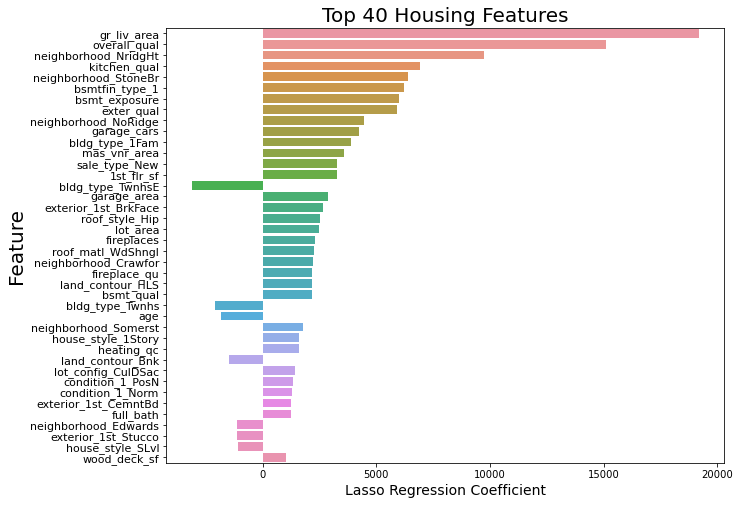

In [3]:
# Create a dataframe with all the coefficients
lasso_model = pd.DataFrame(columns=['feature', 'coef', 'abs_coef'])
lasso_model['feature'] = X_train.columns
lasso_model['coef'] = lasso.coef_
lasso_model['abs_coef'] = abs(lasso.coef_)

# Plot top 40 features (sorted by absolute regression coefficient)
data = lasso_model.sort_values(by='abs_coef', ascending=False).head(40)[['feature', 'coef']] 

plt.figure(figsize=(10,8))
ax = sns.barplot(data=data, y='feature', x='coef', orient='h')
ax.set_ylabel('Feature', fontsize=20)
ax.set_yticklabels(data['feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 40 Housing Features', size=20);

## Conclusions

The top features that increases the saleprice seems reasonable. The ground living area and overall quality of the house were top, followed by the quality of the kitchen and the exterior and if the house is in the NrighHt and StoneBr neighbourhood.

On the flip side, the features that decreases the saleprice the most were due to location and age of house. The townhouse (both end and inside unit)  and the age of the unit, followed by if the house was banked, and if it belonged in the Edwards neighbourhood.

Some features that increase the value of the house can be done through modifications or renovations, within the legal limits of the land.

While the production model is accurate for predicting saleprices of homes below $300,000, above that the error starts to get bigger. I belive this is due to a lack of data for homes with higher sale prices.

Interestingly, most of the top features are on the exterior. This information will help us in our recommendation to the client.

## Recommendations

Some recommendations to client for them to appreciate their property prices
- Focus on making home improvements in the kitchen and exterior, get an assessor to grade the quality
- If planning to increase the ground living area, you should build a bigger garage as this would bring the most value
- Include a fireplace and ensure that the heating around the house is good quality
- Consider changing the roof style to be hip.

Model should not be used on other cities as its not a generalized model. Each city has different external factors that affect the housing prices that might not be accounted for in this model, like its climate and economical position etc. For a generalised model, new features will need to be included and a new model will need to be fitted, although this would generally cause our model to have a larger variance as some features applied to the model will not be relevant to particular cities.

## Submit CSV File to Kaggle

In [4]:
# Create dataframe for saleprice
pred_to_df = pd.DataFrame(
    y_pred, 
    columns=['Saleprice']
)

# Merge saleprice dataframe with test dataset
output = original_test.merge(
    pred_to_df, 
    how='left', 
    left_index=True, 
    right_index=True
)

# Create cvs file of Id & Saleprice to submit to kaggle
output.loc[
    :,
    ['Id','Saleprice']
].to_csv('./datasets/submit_kaggle.csv', index=False)

### Kaggle results

Using the Lasso Model, I attained a RMSE score of 31877.

![title](./images/kaggle_submission.png)